In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eli5




In [22]:
df=pd.read_csv('C:/Users/Sanuri/Desktop/DataScience/FootballData.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [3]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club_Logo', 'Value', 'Wage', 'Special',
       'Preferred_Foot', 'International_Reputation', 'WeakFoot', 'SkillMoves',
       'Work Rate', 'Body_Type', 'Real Face', 'Position', 'Jersey Number',
       'Joined', 'Loaned_From', 'Contract_Valid_Until', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
 

In [4]:
df.drop(['Unnamed: 0','Photo','Flag','Club_Logo'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 85 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Nationality                 18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred_Foot              18159 non-null object
International_Reputation    18159 non-null float64
WeakFoot                    18159 non-null float64
SkillMoves                  18159 non-null float64
Work Rate                   18159 non-null object
Body_Type                   18159 non-null object
Real Face                   18159 non-null object
Position                    18147 non-null 

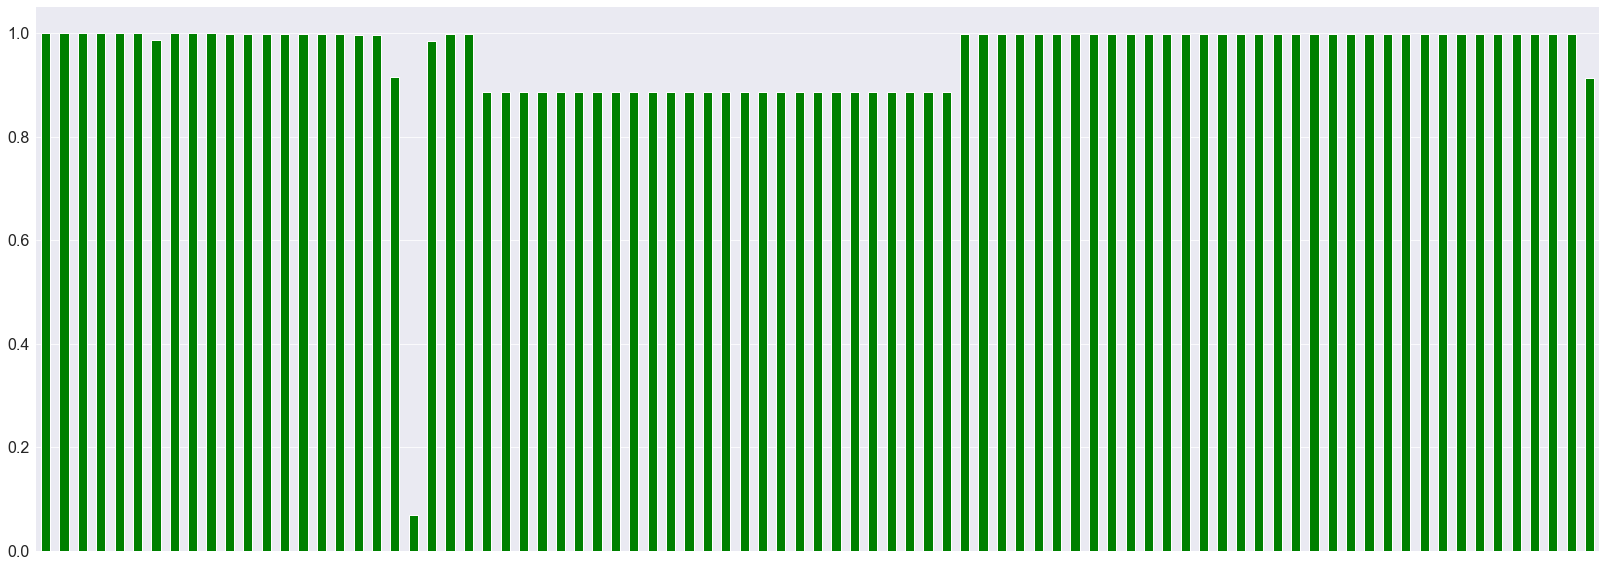

In [6]:
#To reduce the amount of data lets drop the coulmns which have very less data

msno.bar(df.sample( 18207 ),(28,10),color='green')
#Too less data in Loaned from so lets drop it

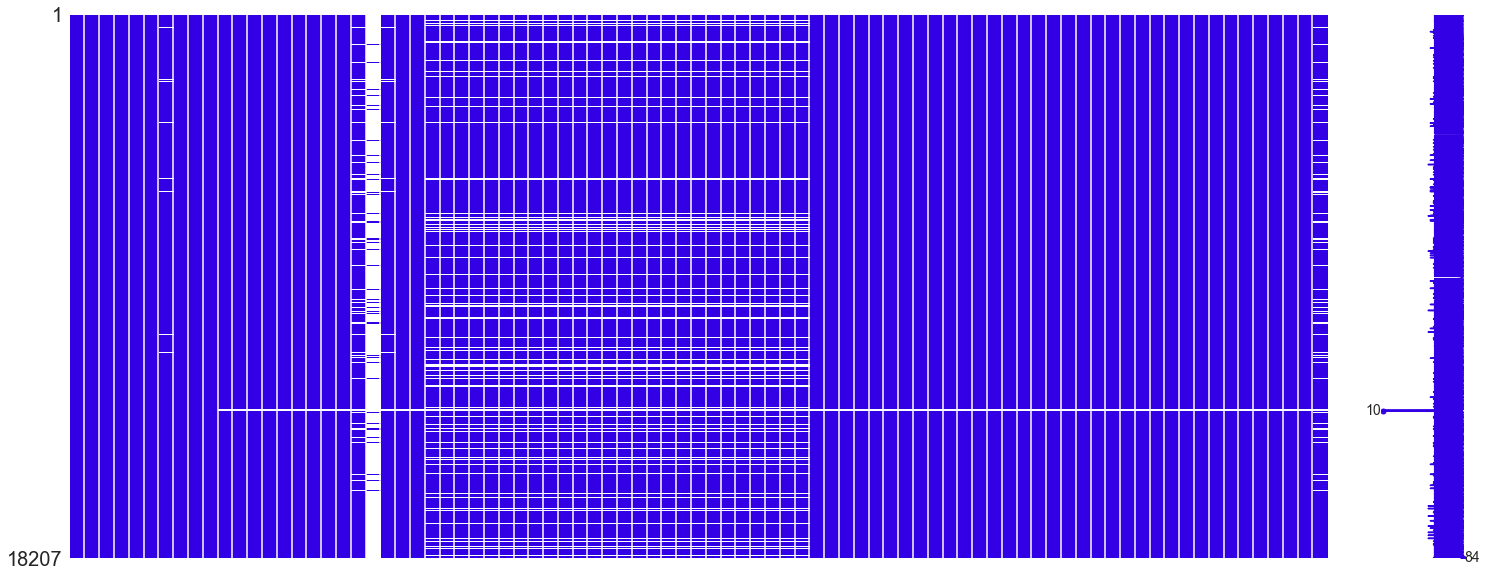

In [7]:
#Missing data in form of white lines 
msno.matrix(df,color=(0.2,0,0.9))

In [8]:
df.drop(['Loaned_From'],axis=1,inplace=True)

# Data Analysis

In [9]:
#Number of countries available and top 5 countries with highest number of players
print('Total number of countries : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(5))

#European Countries have most players

Total number of countries : 164
England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64


In [10]:
#Total number of clubs present and top 5 clubs with highest number of players
print('Total number of clubs : {0}'.format(df['Club'].nunique()))
print(df['Club'].value_counts().head(5))

Total number of clubs : 651
Tottenham Hotspur    33
Atlético Madrid      33
Valencia CF          33
Rayo Vallecano       33
Everton              33
Name: Club, dtype: int64


In [11]:
#Player with maximum Potential and Overall Performance
print('Maximum Potential : '+str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(df.loc[df['Overall'].idxmax()][1]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


In [12]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][1]))
    i += 1

Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


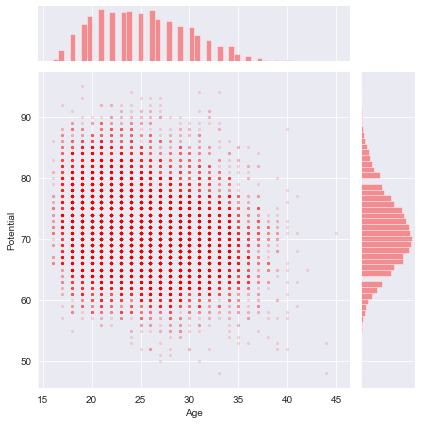

In [13]:
sns.jointplot(x=df['Age'],y=df['Potential'],
              joint_kws={'alpha':0.1,'s':5,'color':'red'},
              marginal_kws={'color':'red'})

#Potential tends to fall as you grow old

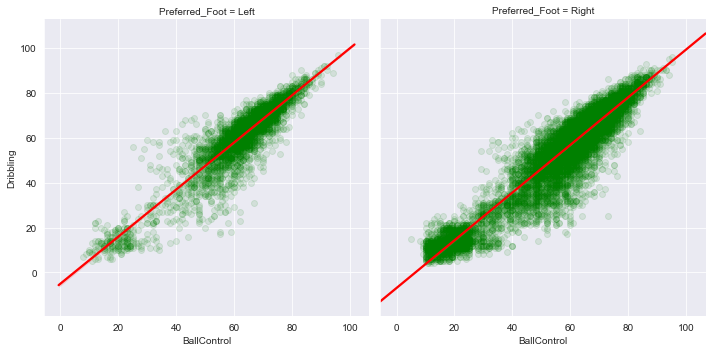

In [14]:
# Better is left-footed or rigth-footed players?
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,col = 'Preferred_Foot',scatter_kws = {'alpha':0.1,'color':'green'},
           line_kws={'color':'red'})


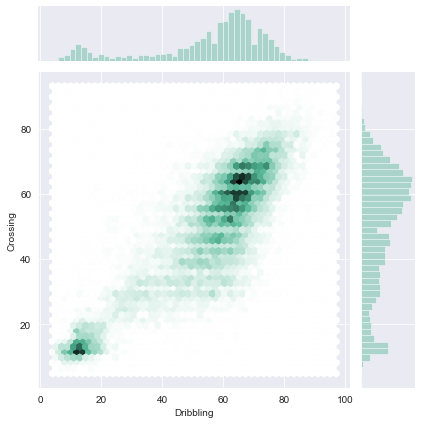

In [15]:
# Crossing vs. dribbling
sns.jointplot(x=df['Dribbling'], y=df['Crossing'], kind="hex", color="#4CB391");

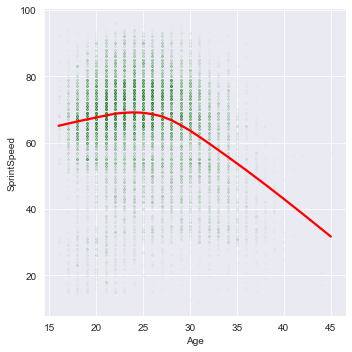

In [17]:
sns.lmplot(data = df, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'green'}, 
           line_kws={'color':'red'})
#As the age increases the sprint speed decreases

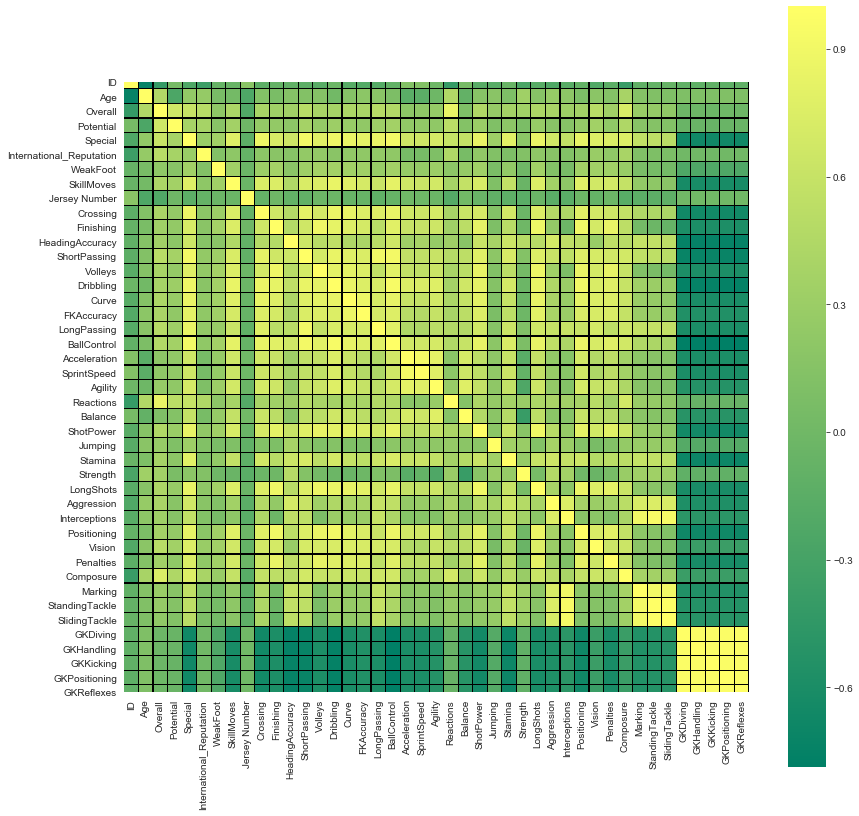

In [19]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),linewidths=0.1,linecolor='black',square=True,cmap='summer')

#Lowest correlation among the goalkeeping side with other columns and high among themselves 

# Modelling

In [20]:
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance
from collections import Counter
import missingno as msno

df=pd.read_csv('C:/Users/Sanuri/Desktop/DataScience/FootballData.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [23]:
df=pd.read_csv('C:/Users/Sanuri/Desktop/DataScience/FootballData.csv')

#DROP UNNECESSARY VALUES
drop_cols = df.columns[28:54]
df = df.drop(drop_cols, axis = 1)
df = df.drop(['Unnamed: 0','ID','Photo','Flag','Club_Logo','Jersey Number','Joined','Special','Loaned_From','Body_Type', 'Release Clause',
               'Weight','Height','Contract_Valid_Until','Wage','Value','Name','Club','Real Face','Nationality'], axis = 1)
df = df.dropna()
df.head()

,Age,Overall,Potential,Preferred_Foot,International_Reputation,WeakFoot,SkillMoves,Work Rate,Position,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,31,94,94,Left,5.0,4.0,4.0,Medium/ Medium,RF,84.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,33,94,94,Right,5.0,4.0,5.0,High/ Low,ST,84.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,26,92,93,Right,5.0,5.0,5.0,High/ Medium,LW,79.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,27,91,93,Right,4.0,3.0,1.0,Medium/ Medium,GK,17.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,27,91,92,Right,4.0,5.0,4.0,High/ High,RCM,93.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [24]:
#Turn Preferred Foot into a binary indicator variable
def right_footed(df):
    if (df['Preferred_Foot'] == 'Right'):
        return 1
    else:
        return 0
    
#Create a simplified position varaible to account for all player positions
def simple_position(df):
    if (df['Position'] == 'GK'):
        return 'GK'
    #Defenders Center_Back
    elif ((df['Position'] == 'LCB') | (df['Position'] == 'RCB')):
        return 'CB'
    #Wing_Back
    elif ((df['Position'] == 'LWB') | (df['Position'] == 'LB') | (df['Position'] == 'RWB')|(df['Position'] == 'RB')):
        return 'WB'
    #Midfielders
    #CAM
    elif ((df['Position'] == 'CAM') | (df['Position'] == 'LAM')):
        return 'CAM'
    #RM or RCM
    elif ((df['Position'] == 'RM') | (df['Position'] == 'RCM')):
        return 'RM'
    #LM or LCM
    elif ((df['Position'] == 'LM') | (df['Position'] == 'LCM')):
        return 'LM'
    #Attackers
    #left winger
    elif ((df['Position'] == 'LW') | (df['Position'] == 'LM')|(df['Position']=='LS')):
        return 'LW'
    #Right winger
    elif ((df['Position'] == 'RW') | (df['Position'] == 'RM')|(df['Position']=='RS')):
        return 'RW'
    #Sricker
    elif ((df['Position'] == 'ST') | (df['Position'] == 'LS')|(df['Position']=='RS')|(df['Position']=='CF')):
        return 'ST'
    else:
        return df.Position
    
   
    
#Create a copy of the original dataframe to avoid indexing errors
df1 = df.copy()

#Apply changes to dataset to create new column
#df1['Real_Face'] = df1.apply(face_to_num, axis=1)
df1['Right_Foot'] = df1.apply(right_footed, axis=1)
df1['Simple_Position'] = df1.apply(simple_position,axis = 1)
#df1['Major_Nation'] = df1.apply(major_nation,axis = 1)

#Split the Work Rate Column in two
tempwork = df1["Work Rate"].str.split("/ ", n = 1, expand = True) 
#Create new column for first work rate
df1["WorkRate1"]= tempwork[0]   
#Create new column for second work rate
df1["WorkRate2"]= tempwork[1]
#Drop original columns used
df1 = df1.drop(['Work Rate','Preferred_Foot', 'Position'], axis = 1)
df1.head()    


,Age,Overall,Potential,International_Reputation,WeakFoot,SkillMoves,Crossing,Finishing,HeadingAccuracy,ShortPassing,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Right_Foot,Simple_Position,WorkRate1,WorkRate2
0,31,94,94,5.0,4.0,4.0,84.0,95.0,70.0,90.0,...,26.0,6.0,11.0,15.0,14.0,8.0,0,RF,Medium,Medium
1,33,94,94,5.0,4.0,5.0,84.0,94.0,89.0,81.0,...,23.0,7.0,11.0,15.0,14.0,11.0,1,ST,High,Low
2,26,92,93,5.0,5.0,5.0,79.0,87.0,62.0,84.0,...,33.0,9.0,9.0,15.0,15.0,11.0,1,LW,High,Medium
3,27,91,93,4.0,3.0,1.0,17.0,13.0,21.0,50.0,...,13.0,90.0,85.0,87.0,88.0,94.0,1,GK,Medium,Medium
4,27,91,92,4.0,5.0,4.0,93.0,82.0,55.0,92.0,...,51.0,15.0,13.0,5.0,10.0,13.0,1,RM,High,High


In [25]:
#Split ID as a Target value
target = df1.Overall
df2 = df1.drop(['Overall'], axis = 1)

#Splitting into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df2, target, test_size=0.2)

#One Hot Encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
print(X_test.shape,X_train.shape)
print(y_test.shape,y_train.shape)

(3630, 62) (14517, 62)
(3630,) (14517,)


In [26]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

#modelTest=LinearRegression()
#modelTest.fit(X_train, y_train)
#PredictionTest=model.predict(45)
#print('The prediction Test result'+str(PredictionTest))

print('The prediction result'+str(predictions))
#Finding the r2 score and root mean squared error
from sklearn.metrics import r2_score, mean_squared_error
print('r2 score: '+str(r2_score(y_test, predictions)))
print('RMSE : '+str(np.sqrt(mean_squared_error(y_test, predictions))))

The prediction result[65.54462502 60.51692673 63.43208833 ... 54.97669998 65.90878823
 63.59539585]
r2 score: 0.930165612967292
RMSE : 1.806249002231244


In [27]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())
#Top 3 important features are Potential, Age & Reactions

Weight,Feature
0.3160 ± 0.0082,Potential
0.1746 ± 0.0102,Age
0.0779 ± 0.0047,Reactions
0.0722 ± 0.0031,BallControl
0.0498 ± 0.0027,GKReflexes
0.0430 ± 0.0033,GKDiving
0.0272 ± 0.0022,GKHandling
0.0270 ± 0.0004,ShortPassing
0.0199 ± 0.0008,Simple_Position_CB
0.0174 ± 0.0022,HeadingAccuracy


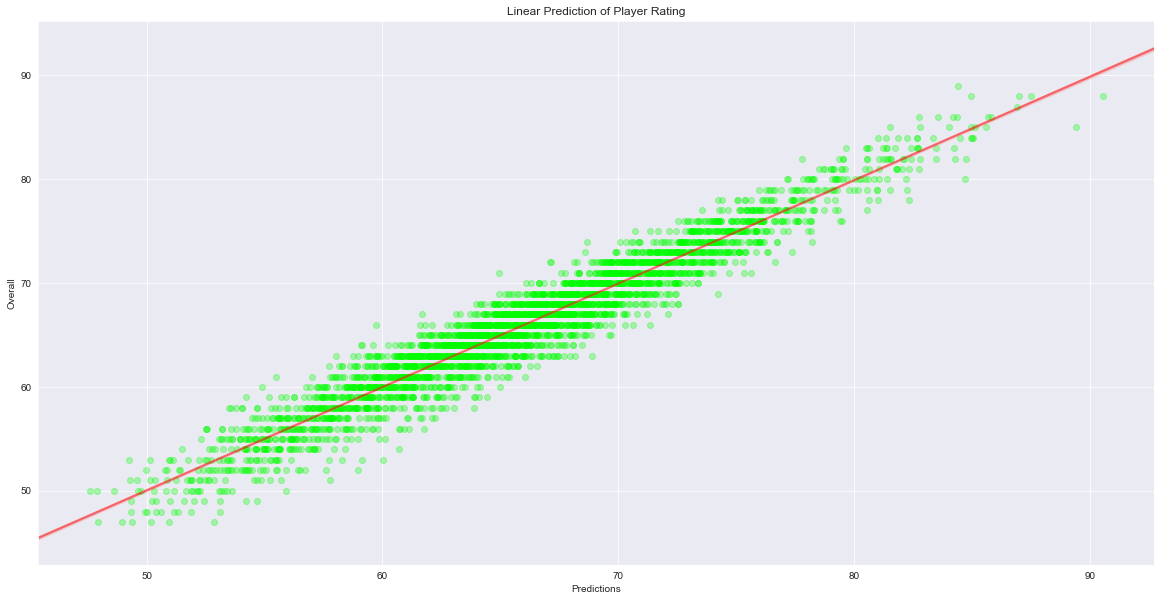

In [28]:
#Visualising the results
plt.figure(figsize=(20,10))
sns.regplot(predictions,y_test,scatter_kws={'alpha':0.3,'color':'lime'},line_kws={'color':'red','alpha':0.5})
plt.xlabel('Predictions')
plt.ylabel('Overall')
plt.title("Linear Prediction of Player Rating")
plt.show()